# **Importing required libraries**

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# **Setting path to training and validation folders**

In [ ]:

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
PATH ='/content/drive/My Drive/toydata'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_heavy_dir = os.path.join(train_dir, 'heavy') 
train_light_dir = os.path.join(train_dir, 'light') 
train_moderate_dir = os.path.join(train_dir, 'moderate') 
validation_heavy_dir = os.path.join(validation_dir, 'heavy')
validation_light_dir = os.path.join(validation_dir, 'light') 
validation_moderate_dir = os.path.join(validation_dir, 'moderate')

Using TensorFlow backend.


# **Using image data generator function for training and testing data**

In [ ]:
batch_size =5
#epochs =50
IMG_HEIGHT =224
IMG_WIDTH =224
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training da
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our valida
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
 directory=train_dir,
 shuffle=True,
 target_size=(IMG_HEIGHT, IMG_WIDTH),
 class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
 directory=validation_dir,
 target_size=(IMG_HEIGHT, IMG_WIDTH),
 class_mode='categorical')

Found 105 images belonging to 3 classes.
Found 42 images belonging to 3 classes.


# **Showing sample images**

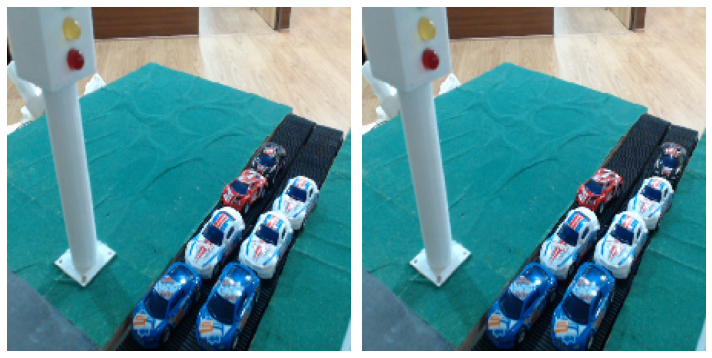

In [ ]:
sample_train_x,train_y = next(train_data_gen)
import matplotlib.image as mpimg
#img = mpimg.imread(sample_train_x[:1])
#plt.imshow(img)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_train_x)

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

# **Designing our CNN for Toy car traffic dataset**

In [ ]:
rp=0.01
model = Sequential()

# convolutional layer
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu', input_shape=(224, 224 ,3)))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu',kernel_regularizer=keras.regularizers.l2(rp)))
model.add(MaxPooling2D(pool_size=(2,2)))
# convolutional layer
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',kernel_regularizer=keras.regularizers.l2(rp)))
#model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',kernel_regularizer=keras.regularizers.l2(rp)))
model.add(MaxPooling2D(pool_size=(2,2)))


'''
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',kernel_regularizer=keras.regularizers.l2(rp)))
model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',kernel_regularizer=keras.regularizers.l2(rp)))
model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',kernel_regularizer=keras.regularizers.l2(rp)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
'''
# flatten output of conv
model.add(Flatten())

# hidden layer

model.add(Dense(512,activation='relu'))


model.add(Dense(256,activation='relu'))



# output layer
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(momentum=0.5),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 401408)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

In [ ]:
history = model.fit(train_data_gen, steps_per_epoch=105//batch_size,epochs=30,validation_data=val_data_gen,validation_steps=42//batch_size)

Epoch 1/30
21/21 [==============================] - 111s 5s/step - loss: 2.5376 - accuracy: 0.4667 - val_loss: 2.5094 - val_accuracy: 0.3500
Epoch 2/30
21/21 [==============================] - 1s 65ms/step - loss: 2.3375 - accuracy: 0.6667 - val_loss: 2.5131 - val_accuracy: 0.3500
Epoch 3/30
21/21 [==============================] - 1s 65ms/step - loss: 2.0761 - accuracy: 0.7238 - val_loss: 1.9537 - val_accuracy: 0.6500
Epoch 4/30
21/21 [==============================] - 1s 66ms/step - loss: 1.8314 - accuracy: 0.7905 - val_loss: 1.7494 - val_accuracy: 0.9250
Epoch 5/30
21/21 [==============================] - 1s 65ms/step - loss: 1.8179 - accuracy: 0.8476 - val_loss: 1.7406 - val_accuracy: 1.0000
Epoch 6/30
21/21 [==============================] - 1s 65ms/step - loss: 1.6660 - accuracy: 0.8857 - val_loss: 1.9502 - val_accuracy: 0.7000
Epoch 7/30
21/21 [==============================] - 1s 65ms/step - loss: 1.5465 - accuracy: 0.9333 - val_loss: 1.5171 - val_accuracy: 0.9250
Epoch 8/30
21

# **Graphical representation of our training accuracy, training loss, validation accuracy and validation loss**

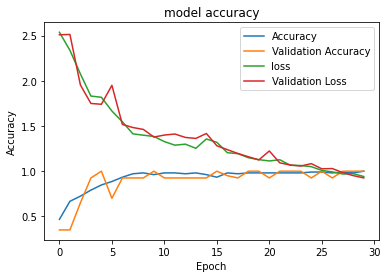

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# **Saving our model**

In [ ]:
model.save('/content/drive/My Drive/toydata/toyCNN.h5')

# **Testing on a single image taken from drive**

In [ ]:
import cv2
test_dir='/content/drive/My Drive/1218.jpg'
img_array = cv2.imread(test_dir) 
new_array = cv2.resize(img_array, (224, 224))  
new_array=new_array.reshape(-1,224,224,3)
#print(new_array.shape)

# **Taking and showing our model's prediction along with our labels**

In [ ]:
predictions = model.predict(new_array)

In [ ]:
test_pred = [np.argmax(probas) for probas in predictions]
print(test_pred)

[0]


In [ ]:
classes = train_data_gen.class_indices    
print(classes)

{'heavy': 0, 'light': 1, 'moderate': 2}


# **Evaluating the model**

In [ ]:
model.evaluate(val_data_gen)

9/9 [==============================] - 1s 75ms/step - loss: 1.9325 - accuracy: 0.9286


[1.9325414896011353, 0.9285714030265808]